In [23]:
import gdal
from matplotlib.pyplot import *
import numpy as np
import pandas as pd

import os
os.chdir('/home/aito/prj/03_indicator/landcover_gdp')

In [24]:
img_ds = gdal.Open('./nation_lcmaps/Singapore.tif')
img = img_ds.ReadAsArray()
img.shape

(24, 66, 131)

In [26]:
years = [1992+i for i in range(24)]

In [27]:
legend_df = pd.read_csv('./ESACCI-LC-Legend.csv', delimiter=';')
for band_idx, year in enumerate(years):
    labels, counts = np.unique(img[band_idx], return_counts=True)
    # Append the total counts of land-cover labels of the year as a new column of the data frame
    legend_df[year] = 0
    ind = legend_df.query('NB_LAB in @labels').index
    legend_df[year].iloc[ind] = counts  

/home/aito/anaconda3/envs/py37_nozz/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [161]:
row_to_drop = legend_df.index[legend_df.LCCOwnLabel == 'No data']
legend_df = legend_df.drop(row_to_drop)

label_def = legend_df[['NB_LAB','LCCOwnLabel','R','G','B']]
legend_df = legend_df.drop(['NB_LAB','R','G','B'], axis=1)

In [28]:
legend_df_t = legend_df.T

In [158]:
label_def

,NB_LAB,LCCOwnLabel,R,G,B
1,10,"Cropland, rainfed",255,255,100
2,11,Herbaceous cover,255,255,100
3,12,Tree or shrub cover,255,255,0
4,20,"Cropland, irrigated or post-flooding",170,240,240
5,30,Mosaic cropland (>50%) / natural vegetation (t...,220,240,100
6,40,"Mosaic natural vegetation (tree, shrub, herbac...",200,200,100
7,50,"Tree cover, broadleaved, evergreen, closed to ...",0,100,0
8,60,"Tree cover, broadleaved, deciduous, closed to ...",0,160,0
9,61,"Tree cover, broadleaved, deciduous, closed (>40%)",0,160,0
10,62,"Tree cover, broadleaved, deciduous, open (15-40%)",170,200,0


In [176]:
legend_df_t = legend_df.T
legend_df_t.columns = legend_df_t.iloc[0]
legend_df_t = legend_df_t.drop(['LCCOwnLabel'], axis=0)
legend_df_t

LCCOwnLabel,"Cropland, rainfed",Herbaceous cover,Tree or shrub cover,"Cropland, irrigated or post-flooding","Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)","Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)","Tree cover, broadleaved, evergreen, closed to open (>15%)","Tree cover, broadleaved, deciduous, closed to open (>15%)","Tree cover, broadleaved, deciduous, closed (>40%)","Tree cover, broadleaved, deciduous, open (15-40%)",...,Sparse herbaceous cover (<15%),"Tree cover, flooded, fresh or brakish water","Tree cover, flooded, saline water","Shrub or herbaceous cover, flooded, fresh/saline/brakish water",Urban areas,Bare areas,Consolidated bare areas,Unconsolidated bare areas,Water bodies,Permanent snow and ice
1992,509,1649,8,17,510,279,479,0,0,0,...,0,3,465,0,1070,0,0,0,400,0
1993,504,1641,8,17,508,279,478,0,0,0,...,0,3,465,0,1086,0,0,0,400,0
1994,498,1623,8,17,508,279,478,0,0,0,...,0,3,461,0,1114,0,0,0,400,0
1995,525,1634,8,17,548,306,355,0,0,0,...,0,3,451,0,1144,0,0,0,398,0
1996,519,1627,10,17,552,312,331,0,0,0,...,0,3,447,0,1173,0,0,0,398,0
1997,518,1615,10,16,557,312,327,0,0,0,...,0,3,441,0,1192,0,0,0,398,0
1998,516,1609,10,16,566,314,315,0,0,0,...,0,3,441,0,1201,0,0,0,398,0
1999,516,1605,10,16,566,314,315,0,0,0,...,0,3,441,0,1205,0,0,0,398,0
2000,515,1601,10,16,566,302,325,0,0,0,...,0,3,442,0,1211,0,0,0,398,0
2001,489,1467,10,14,562,302,319,0,0,0,...,0,3,368,0,1461,0,0,0,394,0


In [177]:
legend_df_t['gdp'] = 0

Index(['Cropland, rainfed', 'Herbaceous cover', 'Tree or shrub cover',
       'Cropland, irrigated or post-flooding',
       'Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)',
       'Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%) ',
       'Tree cover, broadleaved, evergreen, closed to open (>15%)',
       'Tree cover, broadleaved, deciduous, closed to open (>15%)',
       'Tree cover, broadleaved, deciduous, closed (>40%)',
       'Tree cover, broadleaved, deciduous, open (15-40%)',
       'Tree cover, needleleaved, evergreen, closed to open (>15%)',
       'Tree cover, needleleaved, evergreen, closed (>40%)',
       'Tree cover, needleleaved, evergreen, open (15-40%)',
       'Tree cover, needleleaved, deciduous, closed to open (>15%)',
       'Tree cover, needleleaved, deciduous, closed (>40%)',
       'Tree cover, needleleaved, deciduous, open (15-40%)',
       'Tree cover, mixed leaf type (broadleaved and need

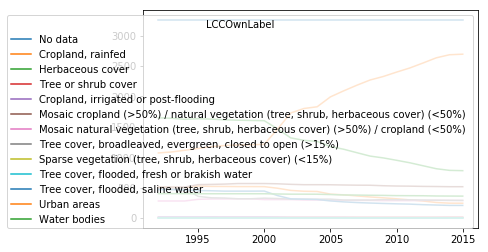

In [69]:
legend_df_t.loc[:, (legend_df_t[5:].sum() != 0)][5:].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c4de75dd8>,
      dtype=object)

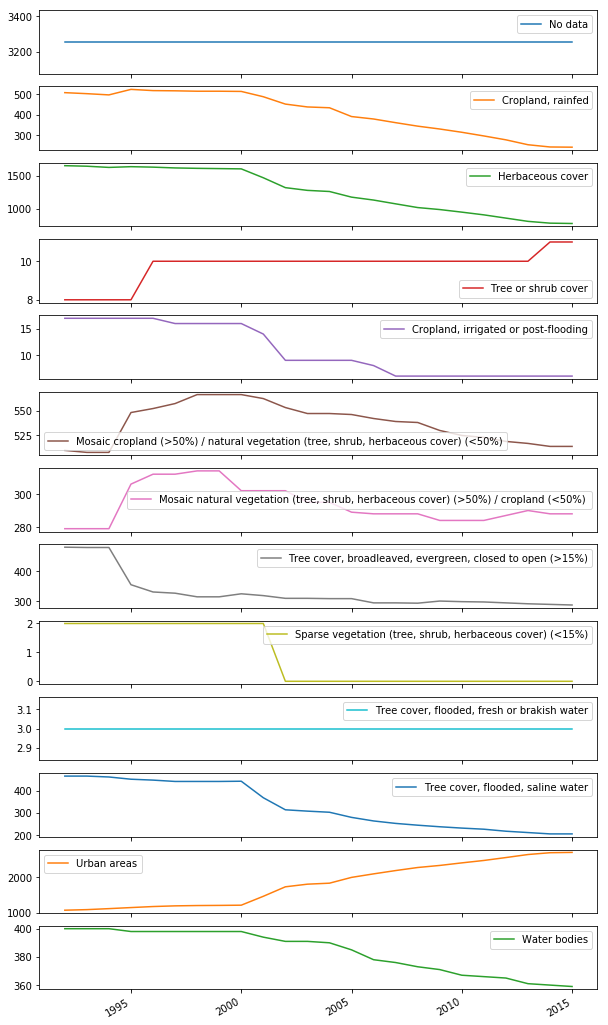

In [73]:
rcParams['figure.figsize'] = [10, 20]
legend_df_t.loc[:, (legend_df_t[5:].sum() != 0)][5:].plot(subplots=True)

In [74]:
legend_df_t.loc[:, (legend_df_t[5:].sum() != 0)][5:]

LCCOwnLabel,No data,"Cropland, rainfed",Herbaceous cover,Tree or shrub cover,"Cropland, irrigated or post-flooding","Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)","Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)","Tree cover, broadleaved, evergreen, closed to open (>15%)","Sparse vegetation (tree, shrub, herbaceous cover) (<15%)","Tree cover, flooded, fresh or brakish water","Tree cover, flooded, saline water",Urban areas,Water bodies
1992,3255,509,1649,8,17,510,279,479,2,3,465,1070,400
1993,3255,504,1641,8,17,508,279,478,2,3,465,1086,400
1994,3255,498,1623,8,17,508,279,478,2,3,461,1114,400
1995,3255,525,1634,8,17,548,306,355,2,3,451,1144,398
1996,3255,519,1627,10,17,552,312,331,2,3,447,1173,398
1997,3255,518,1615,10,16,557,312,327,2,3,441,1192,398
1998,3255,516,1609,10,16,566,314,315,2,3,441,1201,398
1999,3255,516,1605,10,16,566,314,315,2,3,441,1205,398
2000,3255,515,1601,10,16,566,302,325,2,3,442,1211,398
2001,3255,489,1467,10,14,562,302,319,2,3,368,1461,394


In [29]:
index_df = pd.read_excel('./Download-GDPcurrent-NCU-countries.xls', skiprows=2)
gdp_timeseries_singapore_df = index_df[(index_df.Country == 'Singapore') & (index_df.IndicatorName == 'Gross Domestic Product (GDP)')].T.iloc[4:]
year_ind = gdp_timeseries_singapore_df.index
gdp_timeseries_singapore_df[(year_ind >= 1992) & (year_ind <= 2015)]

,2893
1992,8.49628e+10
1993,9.79895e+10
1994,1.12688e+11
1995,1.24575e+11
1996,1.35929e+11
1997,1.48724e+11
1998,1.4344e+11
1999,1.4625e+11
2000,1.65218e+11
2001,1.59974e+11


In [181]:
legend_df_t['gdp'] = gdp_timeseries_singapore_df[(year_ind >= 1992) & (year_ind <= 2015)]

In [206]:
legend_df_t.astype(float)

LCCOwnLabel,"Cropland, rainfed",Herbaceous cover,Tree or shrub cover,"Cropland, irrigated or post-flooding","Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)","Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)","Tree cover, broadleaved, evergreen, closed to open (>15%)","Tree cover, broadleaved, deciduous, closed to open (>15%)","Tree cover, broadleaved, deciduous, closed (>40%)","Tree cover, broadleaved, deciduous, open (15-40%)",...,"Tree cover, flooded, fresh or brakish water","Tree cover, flooded, saline water","Shrub or herbaceous cover, flooded, fresh/saline/brakish water",Urban areas,Bare areas,Consolidated bare areas,Unconsolidated bare areas,Water bodies,Permanent snow and ice,gdp
1992,509.0,1649.0,8.0,17.0,510.0,279.0,479.0,0.0,0.0,0.0,...,3.0,465.0,0.0,1070.0,0.0,0.0,0.0,400.0,0.0,8.496280e+10
1993,504.0,1641.0,8.0,17.0,508.0,279.0,478.0,0.0,0.0,0.0,...,3.0,465.0,0.0,1086.0,0.0,0.0,0.0,400.0,0.0,9.798950e+10
1994,498.0,1623.0,8.0,17.0,508.0,279.0,478.0,0.0,0.0,0.0,...,3.0,461.0,0.0,1114.0,0.0,0.0,0.0,400.0,0.0,1.126882e+11
1995,525.0,1634.0,8.0,17.0,548.0,306.0,355.0,0.0,0.0,0.0,...,3.0,451.0,0.0,1144.0,0.0,0.0,0.0,398.0,0.0,1.245753e+11
1996,519.0,1627.0,10.0,17.0,552.0,312.0,331.0,0.0,0.0,0.0,...,3.0,447.0,0.0,1173.0,0.0,0.0,0.0,398.0,0.0,1.359293e+11
1997,518.0,1615.0,10.0,16.0,557.0,312.0,327.0,0.0,0.0,0.0,...,3.0,441.0,0.0,1192.0,0.0,0.0,0.0,398.0,0.0,1.487235e+11
1998,516.0,1609.0,10.0,16.0,566.0,314.0,315.0,0.0,0.0,0.0,...,3.0,441.0,0.0,1201.0,0.0,0.0,0.0,398.0,0.0,1.434403e+11
1999,516.0,1605.0,10.0,16.0,566.0,314.0,315.0,0.0,0.0,0.0,...,3.0,441.0,0.0,1205.0,0.0,0.0,0.0,398.0,0.0,1.462499e+11
2000,515.0,1601.0,10.0,16.0,566.0,302.0,325.0,0.0,0.0,0.0,...,3.0,442.0,0.0,1211.0,0.0,0.0,0.0,398.0,0.0,1.652177e+11
2001,489.0,1467.0,10.0,14.0,562.0,302.0,319.0,0.0,0.0,0.0,...,3.0,368.0,0.0,1461.0,0.0,0.0,0.0,394.0,0.0,1.599741e+11


In [193]:
legend_df_t.loc[:, legend_df_t.sum() != 0].columns.__len__()

13

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c4cfff400>,
      dtype=object)

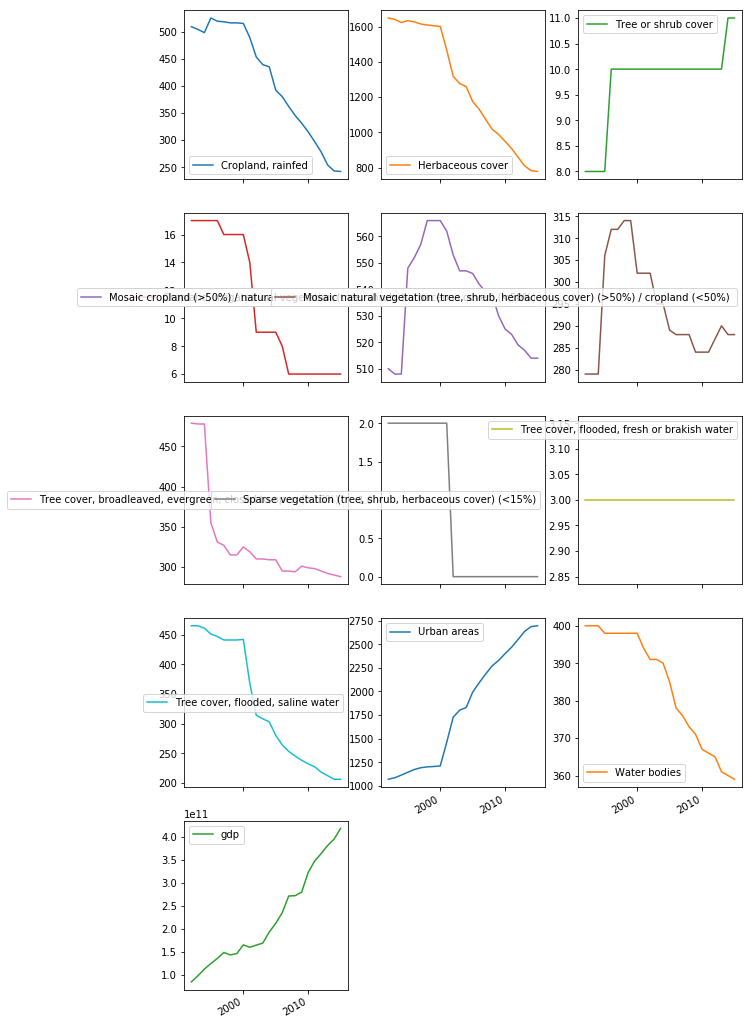

In [194]:
legend_df_t.loc[:, legend_df_t.sum() != 0].plot(subplots=True, layout=(5, 3))

/home/aito/anaconda3/envs/py37_nozz/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  ax.set_xlim(boundaries_list[j])
/home/aito/anaconda3/envs/py37_nozz/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=3.0, top=3.0
  ax.set_ylim(boundaries_list[i])
/home/aito/anaconda3/envs/py37_nozz/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  ax.set_xlim(boundaries_list[i])


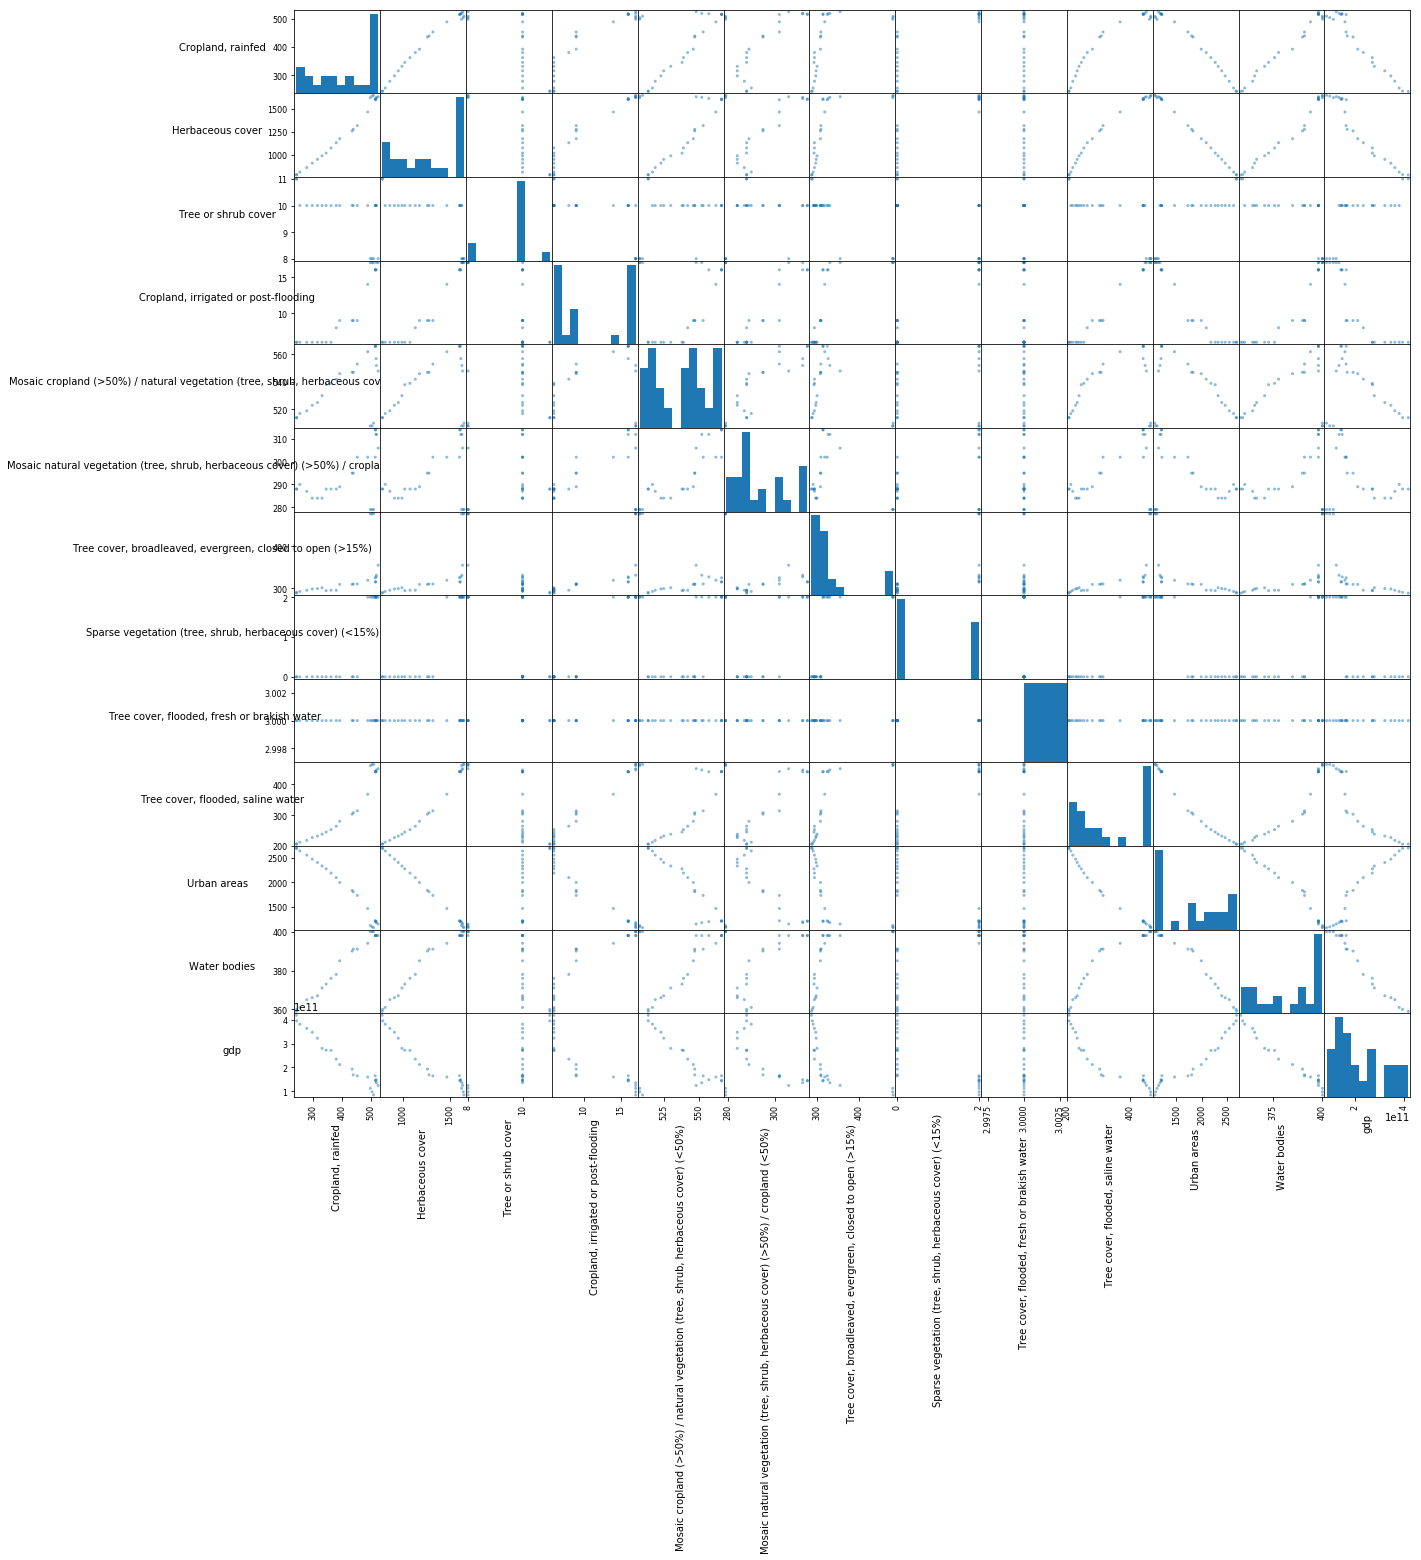

In [210]:
axs = pd.plotting.scatter_matrix(legend_df_t.loc[:, legend_df_t.sum() != 0].astype(float), figsize=[20,20])
n = len(legend_df_t.loc[:, legend_df_t.sum() != 0].columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

In [199]:
legend_df_t

LCCOwnLabel,"Cropland, rainfed",Herbaceous cover,Tree or shrub cover,"Cropland, irrigated or post-flooding","Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)","Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)","Tree cover, broadleaved, evergreen, closed to open (>15%)","Tree cover, broadleaved, deciduous, closed to open (>15%)","Tree cover, broadleaved, deciduous, closed (>40%)","Tree cover, broadleaved, deciduous, open (15-40%)",...,"Tree cover, flooded, fresh or brakish water","Tree cover, flooded, saline water","Shrub or herbaceous cover, flooded, fresh/saline/brakish water",Urban areas,Bare areas,Consolidated bare areas,Unconsolidated bare areas,Water bodies,Permanent snow and ice,gdp
1992,509,1649,8,17,510,279,479,0,0,0,...,3,465,0,1070,0,0,0,400,0,8.49628e+10
1993,504,1641,8,17,508,279,478,0,0,0,...,3,465,0,1086,0,0,0,400,0,9.79895e+10
1994,498,1623,8,17,508,279,478,0,0,0,...,3,461,0,1114,0,0,0,400,0,1.12688e+11
1995,525,1634,8,17,548,306,355,0,0,0,...,3,451,0,1144,0,0,0,398,0,1.24575e+11
1996,519,1627,10,17,552,312,331,0,0,0,...,3,447,0,1173,0,0,0,398,0,1.35929e+11
1997,518,1615,10,16,557,312,327,0,0,0,...,3,441,0,1192,0,0,0,398,0,1.48724e+11
1998,516,1609,10,16,566,314,315,0,0,0,...,3,441,0,1201,0,0,0,398,0,1.4344e+11
1999,516,1605,10,16,566,314,315,0,0,0,...,3,441,0,1205,0,0,0,398,0,1.4625e+11
2000,515,1601,10,16,566,302,325,0,0,0,...,3,442,0,1211,0,0,0,398,0,1.65218e+11
2001,489,1467,10,14,562,302,319,0,0,0,...,3,368,0,1461,0,0,0,394,0,1.59974e+11
